In [1]:
# This to allow horizontal scrolling
from IPython.display import display, HTML
display(HTML("<style>.jp-OutputArea-output {display:flex}</style>"))

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import uproot
import awkward as ak

sns.set(style="darkgrid")

from hepunits.units import nb, pb, invpb, fb, invfb

In [3]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('max_colwidth', None)

Let's look at the tttt sample

In [4]:
file1 = uproot.open("/import/wu1/tnom6927/Processed/Dilepton/tttt/DAOD_TOPQ1.27733779._000001.root")
file2 = uproot.open("/import/wu1/tnom6927/Processed/Dilepton/tttt/DAOD_TOPQ1.27733779._000002.root")
file =  uproot.open("/import/wu1/atlas/multitop/ntuples/MC16/tttt.root")
nominal1 = file1["nominal"]
nominal2 = file2["nominal"]
nominal  = file["nominal"]
nominal.typenames()

{'weight_mc': 'float',
 'weight_pileup': 'float',
 'weight_leptonSF': 'float',
 'weight_globalLeptonTriggerSF': 'float',
 'weight_oldTriggerSF': 'float',
 'weight_bTagSF_DL1_77': 'float',
 'weight_bTagSF_DL1r_77': 'float',
 'weight_bTagSF_DL1_70': 'float',
 'weight_bTagSF_DL1r_70': 'float',
 'weight_bTagSF_DL1_60': 'float',
 'weight_bTagSF_DL1r_60': 'float',
 'weight_bTagSF_DL1_85': 'float',
 'weight_bTagSF_DL1r_85': 'float',
 'weight_jvt': 'float',
 'weight_pileup_UP': 'float',
 'weight_pileup_DOWN': 'float',
 'weight_leptonSF_EL_SF_Trigger_UP': 'float',
 'weight_leptonSF_EL_SF_Trigger_DOWN': 'float',
 'weight_leptonSF_EL_SF_Reco_UP': 'float',
 'weight_leptonSF_EL_SF_Reco_DOWN': 'float',
 'weight_leptonSF_EL_SF_ID_UP': 'float',
 'weight_leptonSF_EL_SF_ID_DOWN': 'float',
 'weight_leptonSF_EL_SF_Isol_UP': 'float',
 'weight_leptonSF_EL_SF_Isol_DOWN': 'float',
 'weight_leptonSF_MU_SF_Trigger_STAT_UP': 'float',
 'weight_leptonSF_MU_SF_Trigger_STAT_DOWN': 'float',
 'weight_leptonSF_MU_SF_Tr

In [5]:
el_pt_1 = nominal1["el_pt"].array()
el_pt_2 = nominal2["el_pt"].array()
el_pt   = nominal["el_pt"].array()
mu_pt   = nominal["mu_pt"].array()
print(len(el_pt_1), len(el_pt_2), len(el_pt))

628 658 834733


In [6]:
# nominal.all_members
# nominal.typenames()
# nominal.show()

In [7]:
el_pt.show()

[[7.94e+04, 7.19e+04],
 [],
 [],
 [5.47e+04],
 [2.8e+04],
 [],
 [7.9e+04, 3.16e+04],
 [2.27e+05, 2.12e+05],
 [1.1e+05],
 [7.96e+04],
 ...,
 [],
 [1.03e+05],
 [4.72e+04],
 [3.48e+04],
 [],
 [],
 [6.86e+04],
 [],
 []]


In [8]:
mu_pt.show()

[[7.05e+04],
 [1.78e+05, 5.95e+04],
 [9.23e+04, 2.82e+04],
 [7.11e+04],
 [3.23e+05],
 [1.27e+05, 1.14e+05],
 [],
 [],
 [3.56e+04],
 [4.26e+04],
 ...,
 [7.85e+04, 5.45e+04],
 [1.42e+05, 1.09e+05],
 [7.51e+04],
 [4.18e+04],
 [2.89e+05, 1.17e+05],
 [1.06e+05, 3.06e+04],
 [1.9e+05],
 [2.15e+05, 4.1e+04],
 [1.41e+05, 4.89e+04]]


In [9]:
len(el_pt)

834733

In [10]:
ak.num(el_pt, axis=1)

<Array [2, 0, 0, 1, 1, 0, 2, 2, ..., 1, 1, 0, 0, 1, 0, 0] type='834733 * int64'>

In [11]:
lep_pt = ak.concatenate([el_pt, mu_pt], axis=1)
lep_pt.show()

[[7.94e+04, 7.19e+04, 7.05e+04],
 [1.78e+05, 5.95e+04],
 [9.23e+04, 2.82e+04],
 [5.47e+04, 7.11e+04],
 [2.8e+04, 3.23e+05],
 [1.27e+05, 1.14e+05],
 [7.9e+04, 3.16e+04],
 [2.27e+05, 2.12e+05],
 [1.1e+05, 3.56e+04],
 [7.96e+04, 4.26e+04],
 ...,
 [7.85e+04, 5.45e+04],
 [1.03e+05, 1.42e+05, 1.09e+05],
 [4.72e+04, 7.51e+04],
 [3.48e+04, 4.18e+04],
 [2.89e+05, 1.17e+05],
 [1.06e+05, 3.06e+04],
 [6.86e+04, 1.9e+05],
 [2.15e+05, 4.1e+04],
 [1.41e+05, 4.89e+04]]


In [12]:
import boost_histogram as bh
import matplotlib.pyplot as plt

import mplhep as hep
#plt.style.use(hep.style.ATLAS)

In [13]:
hist1 = bh.Histogram(bh.axis.Integer(0, 5, metadata="Number of electrons"))
hist2 = bh.Histogram(bh.axis.Integer(0, 5, metadata="Number of muons"))

In [14]:
hist1.fill(ak.num(el_pt, axis=1))
hist2.fill(ak.num(mu_pt, axis=1))

Histogram(Integer(0, 5, metadata='Number of muons'), storage=Double()) # Sum: 834733.0

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f81b3afdc90>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

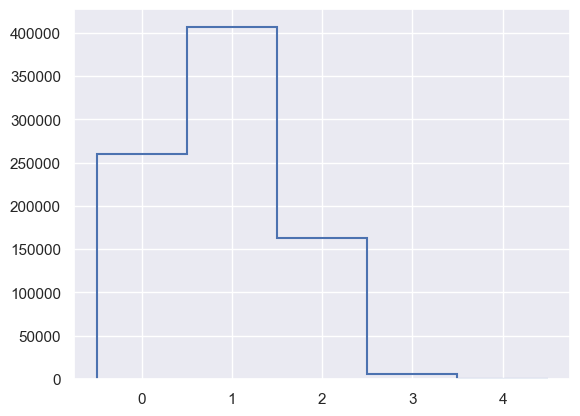

In [15]:
hep.histplot(hist1)

In [16]:
print(hist1)

          ┌──────────────────────────────────────────────────────────────────┐
-1 0      │                                                                  │
 0 259614 │█████████████████████████████████████████▌                        │
 1 406486 │█████████████████████████████████████████████████████████████████ │
 2 162810 │██████████████████████████                                        │
 3 5823   │▉                                                                 │
 4 0      │                                                                  │
 5 0      │                                                                  │
          └──────────────────────────────────────────────────────────────────┘


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f827a202350>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

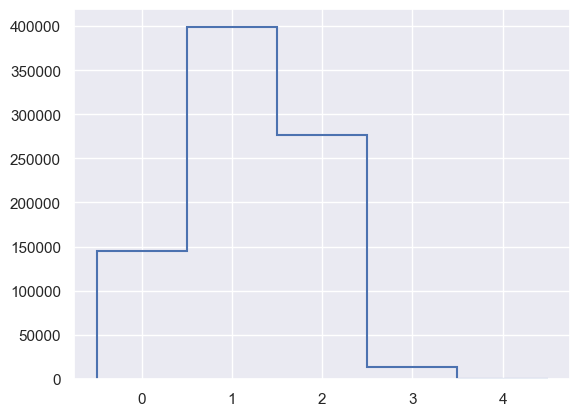

In [17]:
hep.histplot(hist2)

In [18]:
print(hist2)

          ┌──────────────────────────────────────────────────────────────────┐
-1 0      │                                                                  │
 0 145129 │███████████████████████▋                                          │
 1 398647 │█████████████████████████████████████████████████████████████████ │
 2 277011 │█████████████████████████████████████████████▏                    │
 3 13946  │██▎                                                               │
 4 0      │                                                                  │
 5 0      │                                                                  │
          └──────────────────────────────────────────────────────────────────┘


In [19]:
#from plothist import make_hist, plot_hist
#import matplotlib.pyplot as plt

#name = "Number of electrons"

#fig, ax = plt.subplots()

#h = make_hist(ak.num(el_pt, axis=1))

#plot_hist(h, ax=ax)

#ax.set_xlabel(name)
#ax.set_ylabel("Entries")

#fig.savefig("Nelec.svg", bbox_inches="tight")